In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/Position_Salaries_plr.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.iloc[:, 1:2].values ## these are vectors change em to matrix  using (-1 makes it a vector)
y = df.iloc[:, 2].values
print(X, y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


 - no need to split data in test and train because we need all the info about the positions and need to find the intermediate value of these & also no need to scale

In [4]:
# Fitting linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [27]:
# Fitting polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(5)
# degrees of polynomial features = 2 (... up to x^2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [28]:
# fit linear regression to polynomial variables
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Text(0.5, 1.0, 'Salary per year of experience (linear regression)')

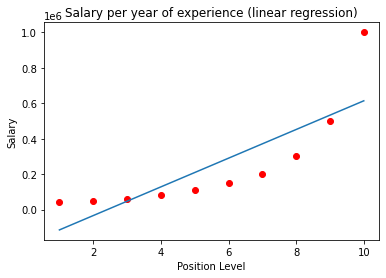

In [29]:
# Visualising linear regression results
plt.scatter(X, y, c='red')
plt.plot(X, lin_reg.predict(X))
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title("Salary per year of experience (linear regression)")

Text(0.5, 1.0, 'Salary per year of experience (Polynomial Regression)')

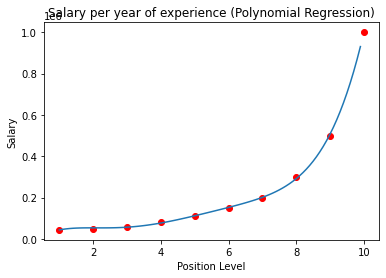

In [30]:
# Visualise the polynomial regression results
X_grid = np.arange(min(X), max(X), 0.1) # gives a vector
X_grid = X_grid.reshape((len(X_grid), 1)) # reshape into a matrix

plt.scatter(X, y, c='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid))) # add the fun in predict so that the code is reusable 
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title("Salary per year of experience (Polynomial Regression)")


In [33]:
# Predict a new result with linear regression
lin_reg.predict([[6.5]]) # = $330378
lin_reg_2.predict(poly_reg.fit_transform([[6.5]])) # = $174878 

array([174878.07765118])